In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.decomposition import PCA
#from scipy.stats.stats import pearsonr
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import svm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from itertools import combinations

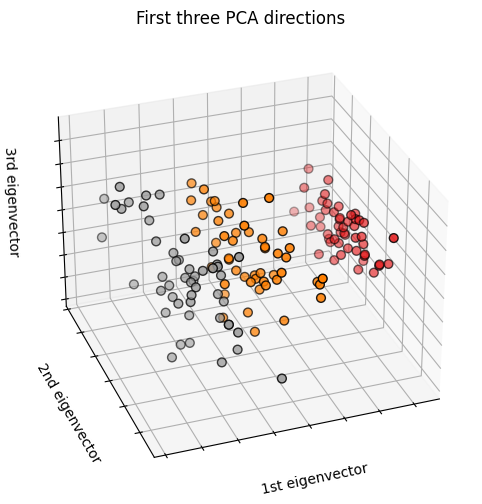

In [2]:
# Download of dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [5]:
# Correlation by all dataframe
df.drop(columns='target').corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [6]:
# With group_by
for_corr = df.groupby('target')
for_corr.corr()

sepal length (cm)  sepal width (cm)   
target                                                          
0.0    sepal length (cm)           1.000000          0.742547  \
       sepal width (cm)            0.742547          1.000000   
       petal length (cm)           0.267176          0.177700   
       petal width (cm)            0.278098          0.232752   
1.0    sepal length (cm)           1.000000          0.525911   
       sepal width (cm)            0.525911          1.000000   
       petal length (cm)           0.754049          0.560522   
       petal width (cm)            0.546461          0.663999   
2.0    sepal length (cm)           1.000000          0.457228   
       sepal width (cm)            0.457228          1.000000   
       petal length (cm)           0.864225          0.401045   
       petal width (cm)            0.281108          0.537728   

                          petal length (cm)  petal width (cm)  
target                                                         
0.0    sepal length (cm)           0.267176          0.278098  
       sepal width (cm)            0.177700          0.232752  
       petal length (cm)           1.000000          0.331630  
       petal width (cm)            0.331630          1.000000  
1.0    sepal length (cm)           0.754049          0.546461  
       sepal width (cm)            0.560522          0.663999  
       petal length (cm)           1.000000          0.786668  
       petal width (cm)            0.786668          1.000000  
2.0    sepal length (cm)           0.864225          0.281108  
       sepal width (cm)            0.401045          0.537728  
       petal length (cm)           1.000000          0.322108  
       petal width (cm)            0.322108          1.000000

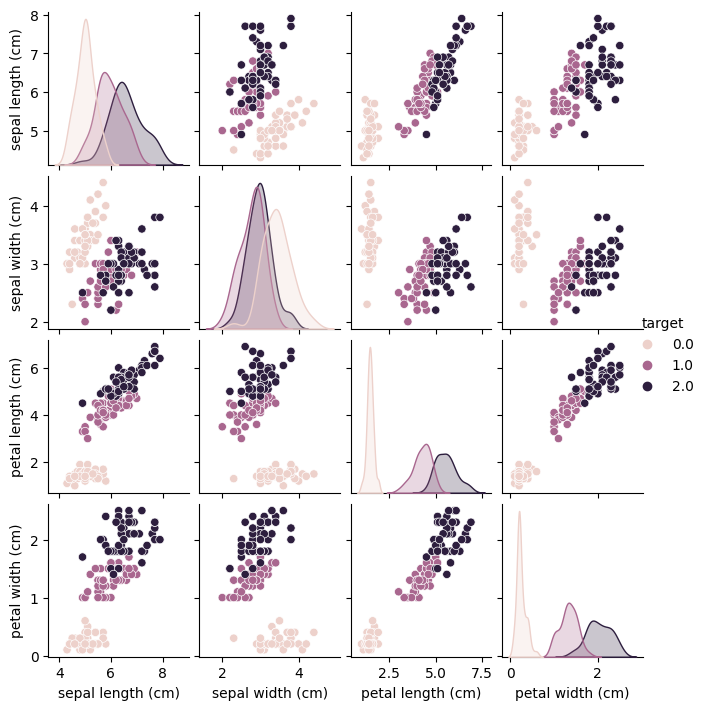

In [7]:
cols = list(df.columns.values)
fig = sns.pairplot(data = df[cols], hue="target")
fig.fig.set_size_inches(7,7)

In [8]:
index_names = df[df['target'] == 0].index
df.drop(index_names, inplace=True)

In [9]:
# Solution with petal width and sepal length 

def make_meshgrid(x, y, h=.02):
    d = 5
    x_min, x_max = x.min() - d, x.max() + d
    y_min, y_max = y.min() - d, y.max() + d
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

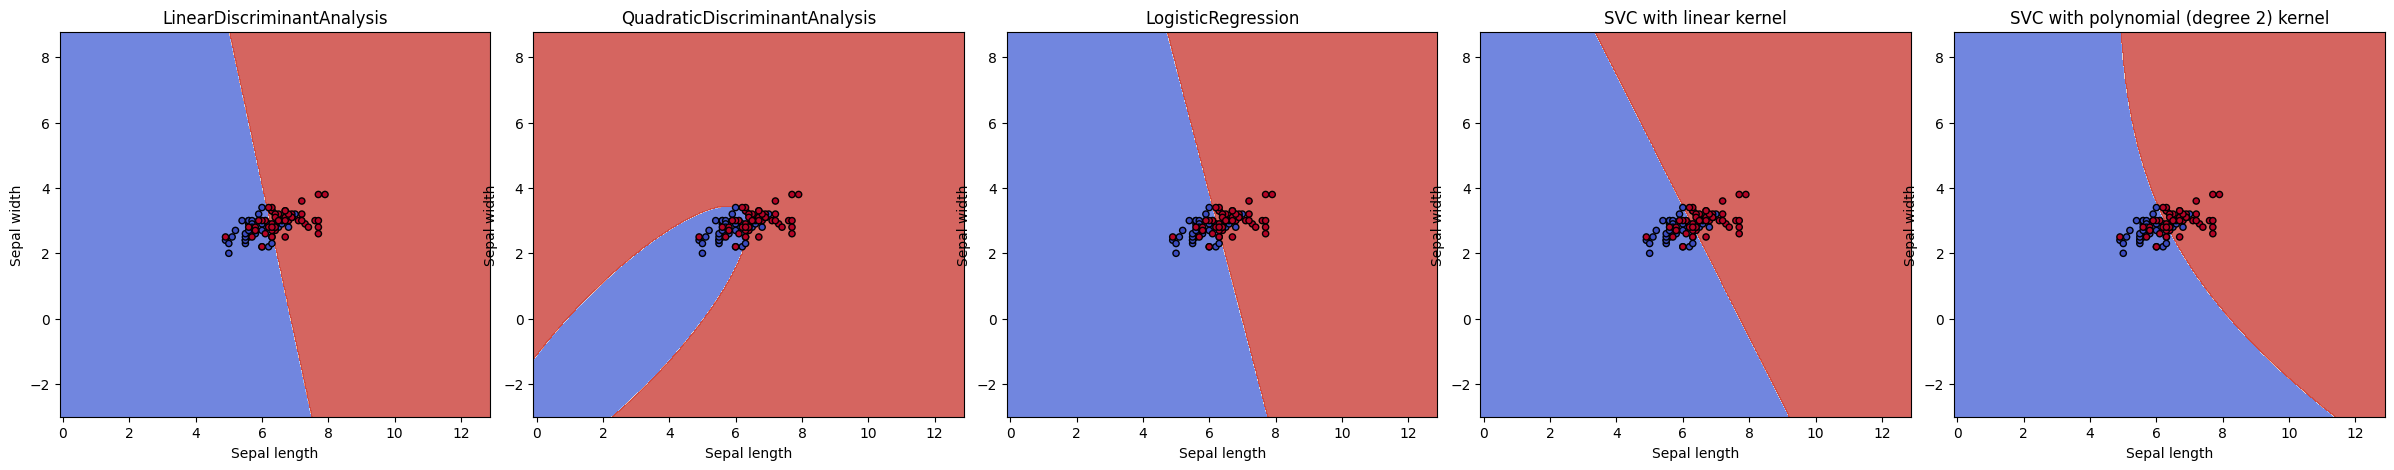

In [10]:
iris = datasets.load_iris()

X = iris.data[iris.target!=0, :2]
y = iris.target[iris.target!=0]

C = 1.0

models = [LinearDiscriminantAnalysis(solver="svd", store_covariance=True),
          QuadraticDiscriminantAnalysis(store_covariance=True),
          LogisticRegression(random_state=0),
          svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='poly', degree=2, gamma='auto', C=C)
          ]

for clf in models:
  clf.fit(X, y)


titles = ['LinearDiscriminantAnalysis',
          'QuadraticDiscriminantAnalysis',
          'LogisticRegression',
          'SVC with linear kernel',
          'SVC with polynomial (degree 2) kernel']

fig, sub = plt.subplots(1, 5,figsize=(30,5))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_title(title)

plt.show()


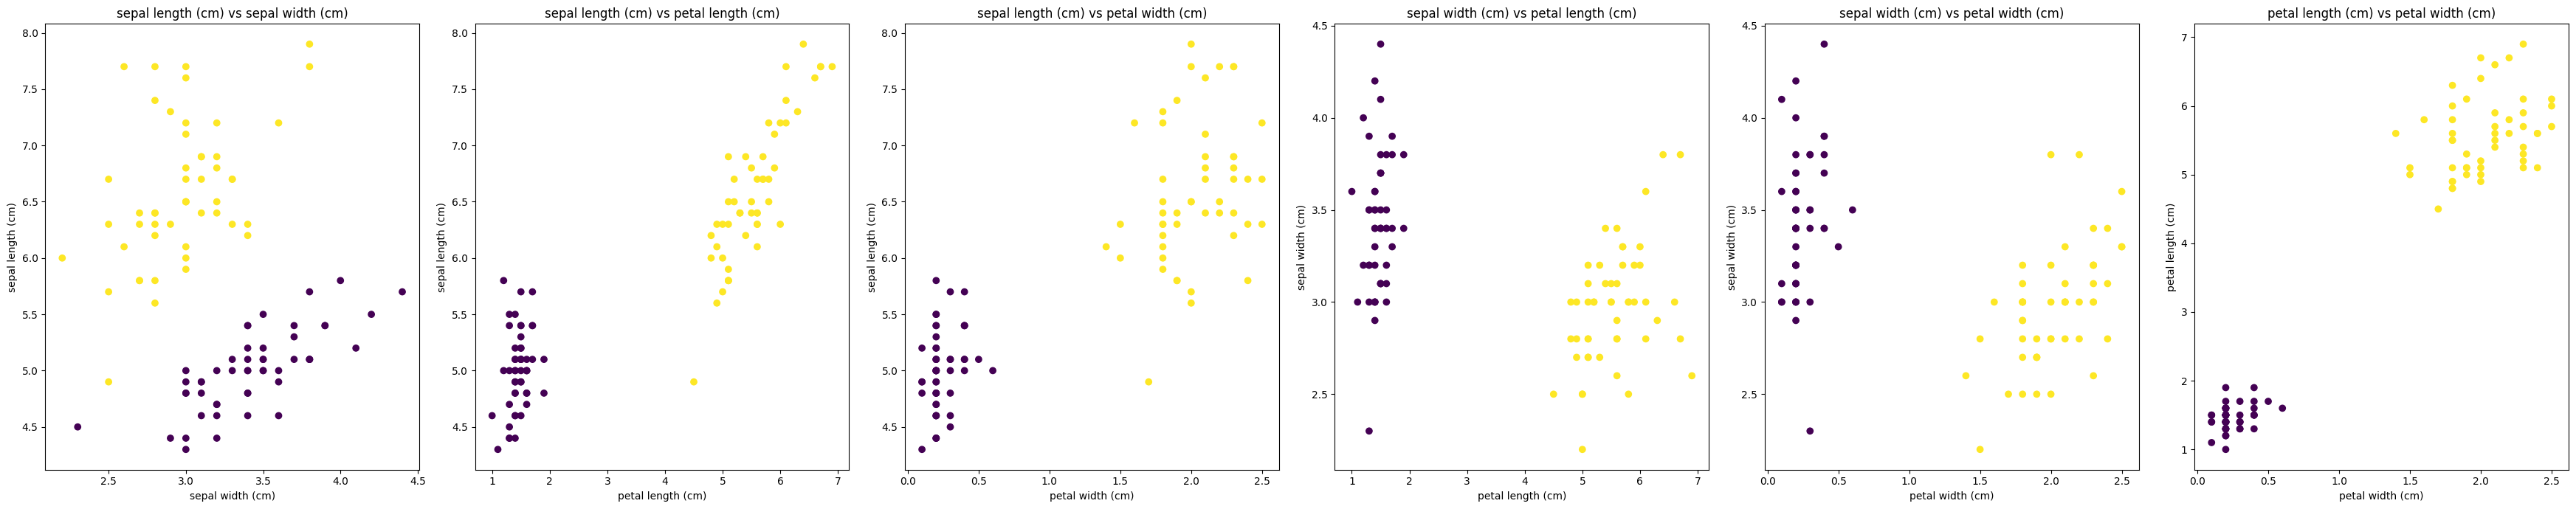

In [11]:
iris = datasets.load_iris()

iris_frame = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame['target'].map(lambda x: iris.target_names[x])

iris = iris_frame[iris_frame["name"].isin(["setosa", "virginica"])]

X = np.array(iris.drop(["target", "name"], axis=1))
y = iris["target"]

features = list(combinations(iris.drop(["target", "name"], axis=1).columns, 2))

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

plt.figure(figsize=(35, 7))
for i, (feature1, feature2) in enumerate(features, 1):
    plt.subplot(1, 6, i)
    idx_feature1 = iris.columns.get_loc(feature1)
    idx_feature2 = iris.columns.get_loc(feature2)

    plt.scatter(X[:, idx_feature2], X[:, idx_feature1], c=y, cmap='viridis')
    plt.xlabel(feature2)
    plt.ylabel(feature1)
    plt.title(f'{feature1} vs {feature2}')

plt.tight_layout()
plt.show()


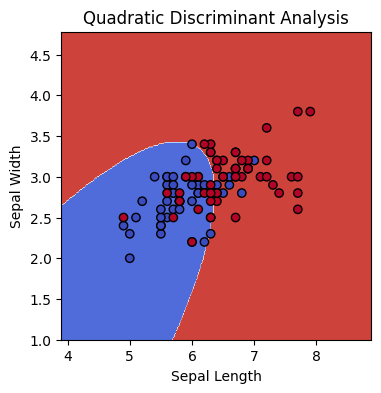

In [12]:
iris = datasets.load_iris()
X = iris.data[iris.target != 0, :2]
y = iris.target[iris.target != 0]
def make_meshgrid(x, y, h=.02):
    d = 1
    x_min, x_max = x.min() - d, x.max() + d
    y_min, y_max = y.min() - d, y.max() + d
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
means_matrix = [np.mean(X[y == i], axis=0) for i in np.unique(y)]
covs_matrix = [np.cov(X[y == i].T) for i in np.unique(y)]

xx, yy = make_meshgrid(X[:, 0], X[:, 1])
res = np.zeros(xx.shape)

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([xx[i, j], yy[i, j]])
        predictions=[]
        for k in range(len(np.unique(y))): # QDA
            inv_cov = np.linalg.inv(covs_matrix[k])
            diff = point - means_matrix[k]
            prediction = -0.5 * np.dot(np.dot(diff.T, inv_cov), diff) - 0.5 * np.log(np.linalg.det(covs_matrix[k]))
            predictions.append(prediction)
        res[i, j] = np.argmax(predictions)

plt.figure(figsize=(4, 4))
plt.contourf(xx, yy, res, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Quadratic Discriminant Analysis')
plt.show()